<center><img src="ignaz_semmelweis_1860_small.jpeg"></center>

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on **June 1st, 1847**, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital and the number of deaths.

The data is stored as two CSV files within the `data` folder.

`data/yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`data/monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

In [49]:
# Imported libraries
import pandas as pd
import matplotlib.pyplot as plt

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2
1842


Text(0, 0.5, 'Proportion deaths')

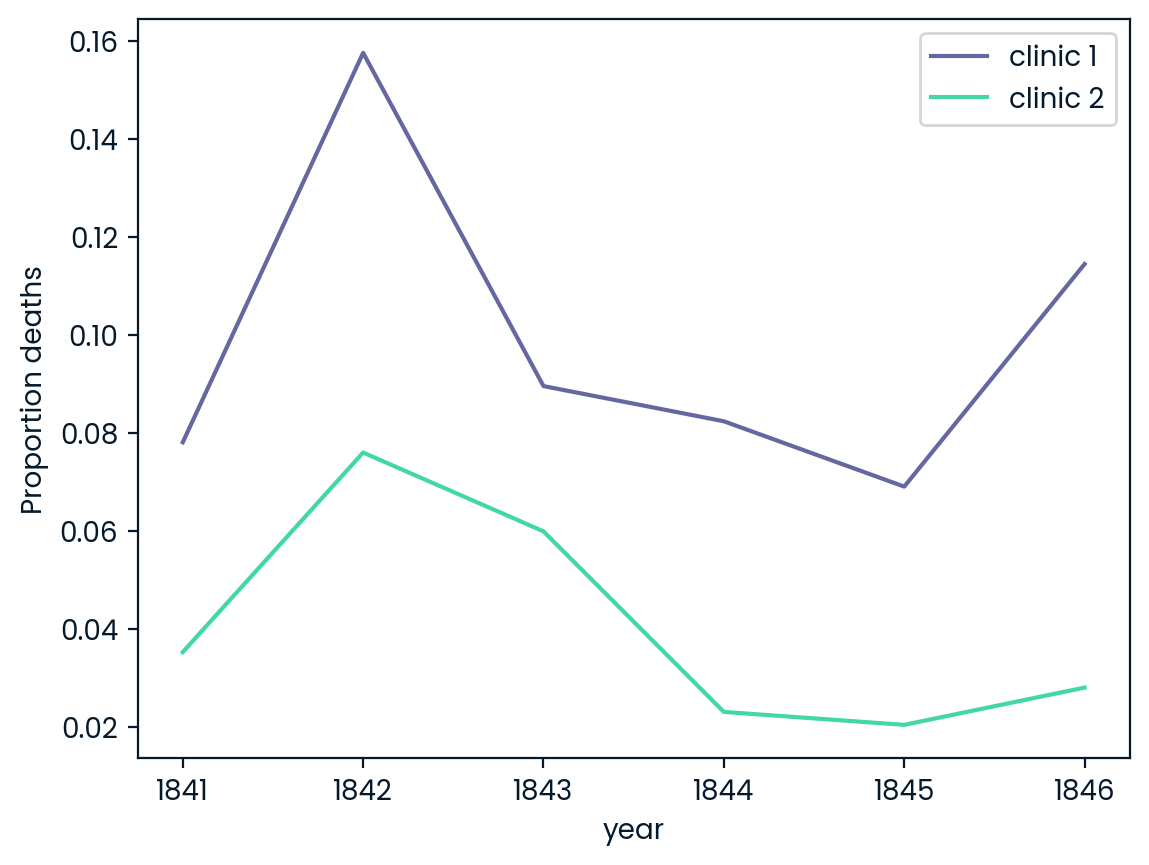

In [50]:
# Start coding here
# Use as many cells as you like!
import pandas as pd

yearly = pd.read_csv("data/yearly_deaths_by_clinic.csv")
#############################################################
# Identify the year with the highest death proportion for each clinic
# Print out yearly
print(yearly)
# Calculate the yearly propotion of deaths
yearly["proportion_deaths"]= yearly.deaths/yearly.births

yearly_clinic1=yearly[yearly.clinic == 'clinic 1']
yearly_clinic2=yearly[yearly.clinic == 'clinic 2']

# highest_year = yearly.year[yearly["proportion_deaths"]== yearly["proportion_deaths"].max()]
highest_year = 1842
print(highest_year)

# Visualize the yearly proportion of deaths
ax = yearly_clinic1.plot(x="year", y="proportion_deaths", label="clinic 1")
ax = yearly_clinic2.plot(x="year", y="proportion_deaths", label="clinic 2", ax=ax)
ax.set_ylabel("Proportion deaths")

In [51]:
######################################################################
# Determine the mean monthlz death proportion before and after handwashing
import pandas as pd
monthly = pd.read_csv("data/monthly_deaths.csv", parse_dates=["date"])





# Calculate the monthly proportion of deaths
monthly["proportion_deaths"] = monthly.deaths / monthly.births

# Adding a threshold and creating a boolean column
handwashing_start = pd.to_datetime('1847-06-01')
# Create a boolean column that shows True after the date handwashing was introduced
monthly['handwashing_started'] = monthly['date'] >= handwashing_start

# Group by the new boolean column calculate the mean proportion of deaths
# Reset the index to store the result as a DataFrame
monthly_summary = monthly.groupby('handwashing_started').agg(mean_proportion_deaths= ('proportion_deaths', 'mean')).reset_index()
print(monthly_summary)

before_washing = monthly[monthly.date < handwashing_start]
after_washing = monthly[monthly.date >= handwashing_start]

# Calculate the mean before and after handwashing
before_washing['proportion_deaths'].mean()
after_washing['proportion_deaths'].mean()
mean_diff= before_washing['proportion_deaths'].mean() - after_washing['proportion_deaths'].mean() 

print(mean_diff)

   handwashing_started  mean_proportion_deaths
0                False                0.105050
1                 True                0.021093
0.08395660751183336


In [52]:
#######################################################################
# Calculate a 95% confidence interval
import pandas as pd
boot_mean_diff=[]
after_proportion = after_washing['proportion_deaths']
before_proportion = before_washing['proportion_deaths']

for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace = True)
    boot_after = after_proportion.sample(frac=1, replace = True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())
    
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
print(confidence_interval)

0.025   -0.100293
0.975   -0.067112
dtype: float64
